In [2]:
import scipy.integrate

In [3]:
from scipy.integrate import solve_ivp as solve

In [16]:
from scipy.integrate import ode as ode

In [38]:
from scipy.integrate import odeint

In [57]:
import matplotlib.pyplot as plt

In [238]:
import matplotlib.animation as anim

In [145]:
plt.style.use('dark_background')

In [23]:
from numpy import exp as exp
import numpy as np

In [6]:
def fun(t,x):
    return exp(x)

In [15]:
sol=solve(fun,)

<ipython-input-6-7d46534cf590>:2: RuntimeWarning: overflow encountered in exp
  return exp(x)


In [12]:
sol.t

array([1., 1.])

In [13]:
sol.y

array([[1., 1.],
       [2., 2.],
       [4., 4.]])

In [17]:
o=ode(fun)

In [20]:
o.

AttributeError: 'ode' object has no attribute 'x'

Nope
$$ \text x(t) = \exp(t)$$
$$ \text y(t) = y^2 + 2 $$
$$ \text u(t) = \text x(t)*\text y(t) $$

Najpierw jedno
$$ \frac{\text d^2 x}{\text d^2 t} = \sqrt{\left(\frac{\text d x}{\text d t}\right)} + \frac{1}{x} $$

In [135]:
def func(x,t):
    return x[1],x[1]**(1/2)+1/x[0]

In [136]:
x0=[1.0,1.0]

In [137]:
time=np.linspace(0,15,100)

In [138]:
od=odeint(func,x0,time)

In [139]:
len(time)

100

No handles with labels found to put in legend.


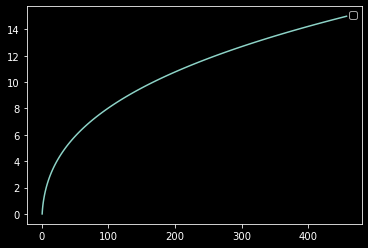

In [146]:
plt.plot(od[:,0],time)
plt.legend()

$$ \frac{\text d x}{\text d t} = y\cdot x $$

$$ \frac{\text d y}{\text d t} = x^y $$

In [200]:
def func(u,t):
    return u[0]*u[1], u[0]**u[1]

In [201]:
u0=[0.0,1.0]

In [202]:
od =odeint(func,u0,time)

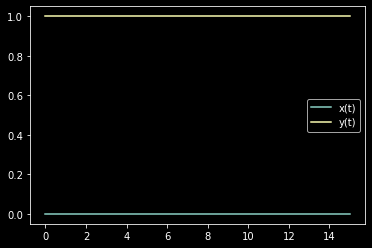

In [203]:
plt.plot(time,od[:,0])
plt.plot(time,od[:,1])
plt.legend(["x(t)","y(t)"])

In [195]:
dd

C:\Users\Kacper\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


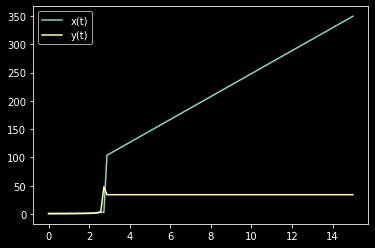

In [204]:
u0=[1/12,1]
od=odeint(func,u0,time)
plt.plot(time,od[:,0])
plt.plot(time,od[:,1])
plt.legend(["x(t)","y(t)"])

$$ \frac{\text d^2 x}{\text d^2 t} = y\frac{\text d x}{\text d t}-x\frac{\text d y}{\text d t}$$

$$ \frac{\text d^2 y}{\text d^2 t} = \frac{\text d x}{\text d t} \cdot \frac{\text d y}{\text d t} $$

In [147]:
def func(u,t):
    return u[1],[u[0,1]*u[1,0]-u[1,1]*u[0,0],u[1,1]*u[1,0]]

In [205]:
def func(u,t):
    return [u[1,0],u[0,1]*u[1,0]-u[1,1]*u[0,0]],[u[1,1],u[1,1]*u[1,0]]

In [212]:
def func(u,t):
    return u[1], u[1]*u[2]-u[3]*u[0], u[3], u[3]*u[1]

In [221]:
u0=[1,1,1,1]

In [222]:
time=np.linspace(0,15,100)

In [223]:
od=odeint(func,u0,time)

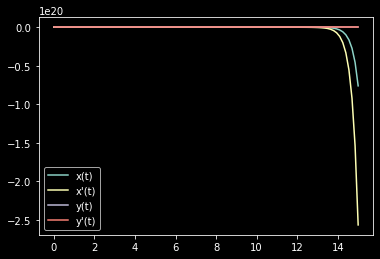

In [224]:
plt.plot(time,od[:,0])
plt.plot(time,od[:,1])
plt.plot(time,od[:,2])
plt.plot(time,od[:,3])
plt.legend(["x(t)","x'(t)","y(t)","y'(t)"])

In [225]:
def r(x,y):
    return (x**2+y**2)**(1/2)

In [227]:
k,m,l=1.5,2.,0.5
def f(x,y):
    return -k/m*(1-l/r(x,y))

In [232]:
g=9.81
def func(u,t):
    x,dx,y,dy=u
    return dx, x*f(x,y), dy, g+y*f(x,y)

In [234]:
od=odeint(func,[np.cos(np.pi/12),0,np.sin(np.pi/12),0],time)

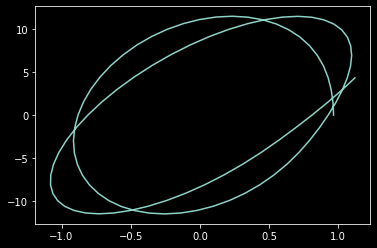

In [246]:
plt.plot(od[:,0],od[:,3])

<IPython.core.display.Javascript object>


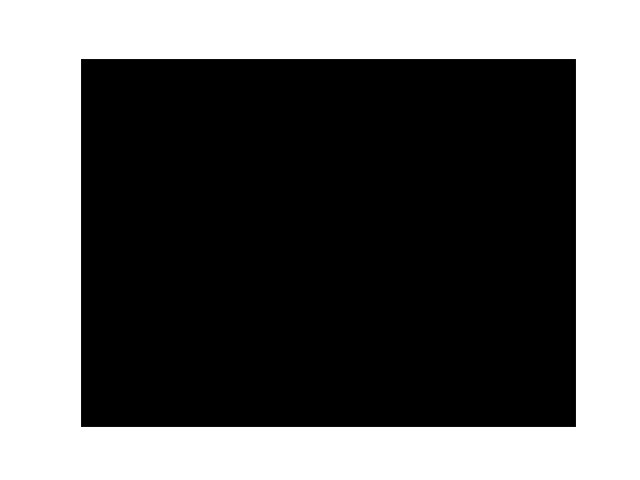

In [327]:
from random import randint

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x=od[:,0]
y=od[:,3]

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
ax.set_xlim(min(x)*1.1,max(x)*1.1)
ax.set_ylim(min(y)*1.1,max(y)*1.1)

def animate(i):
    line.set_data(od[:i,0], od[:i,3])
    return (line,)

ani = FuncAnimation(fig, animate, frames=len(od[:,0]), interval=50,blit=True, )
plt.show()

<IPython.core.display.Javascript object>


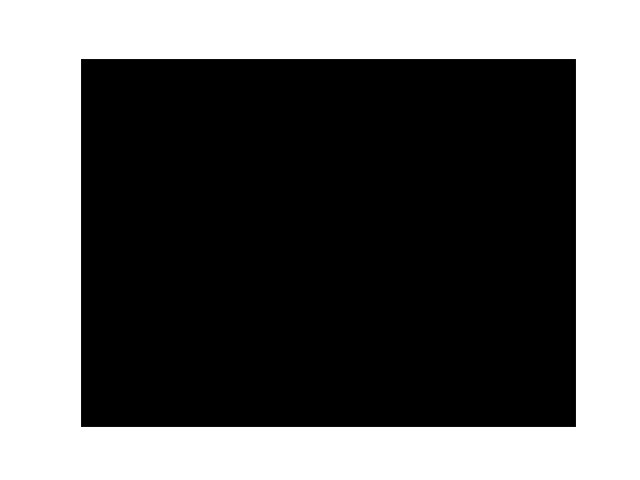

In [331]:
from random import randint

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x=od[:,0]
y=od[:,2]

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))

def animate(i):
    line.set_data(od[:i,0], od[:i,2])
    return (line,)

ani = FuncAnimation(fig, animate, frames=len(od[:,0]), interval=50,blit=True, repeat=True)
plt.show()

In [248]:
def animate(i):
    x.append(od[0,i])
    y.append(od[3,i])

    ax.clear()
    ax.plot(x, y)
    ax.set_xlim([-2,2])
    ax.set_ylim([-11,11])

In [251]:
def animate(i):
    pt = randint(1,9) # grab a random integer to be the next y-value in the animation
    x.append(i)
    y.append(pt)

    ax.clear()
    ax.plot(x, y)
    ax.set_xlim([0,20])
    ax.set_ylim([0,10])

<IPython.core.display.Javascript object>


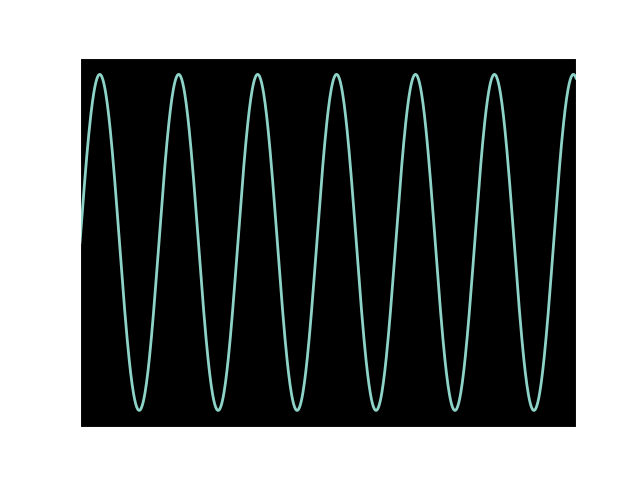

In [322]:
from random import randint

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

def animate(i):
    x = np.linspace(0, 2*np.pi, 1000)
    y = np.sin(2 * np.pi * (x + 0.1 * i))
    line.set_data(x, y)
    return (line,)

ani = FuncAnimation(fig, animate, frames=100, interval=20,blit=True)
plt.show()

In [306]:
%matplotlib notebook

In [261]:
%matplotlin notebook

UsageError: Line magic function `%matplotlin` not found.


In [289]:
plt.show()

<IPython.core.display.Javascript object>


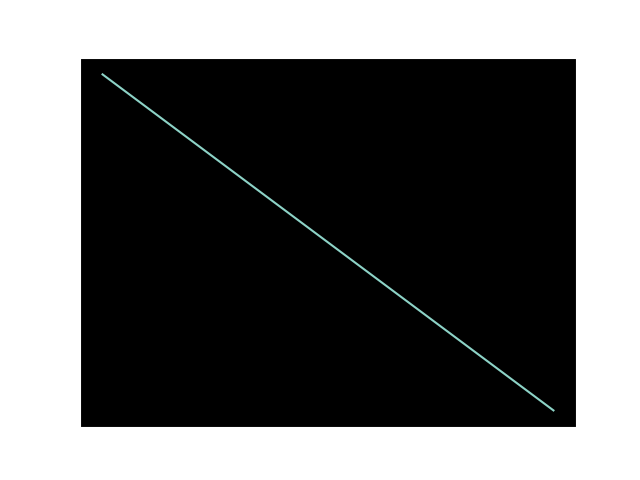

In [275]:
plt.plot([1,2,3],[3,2,1])

<IPython.core.display.Javascript object>


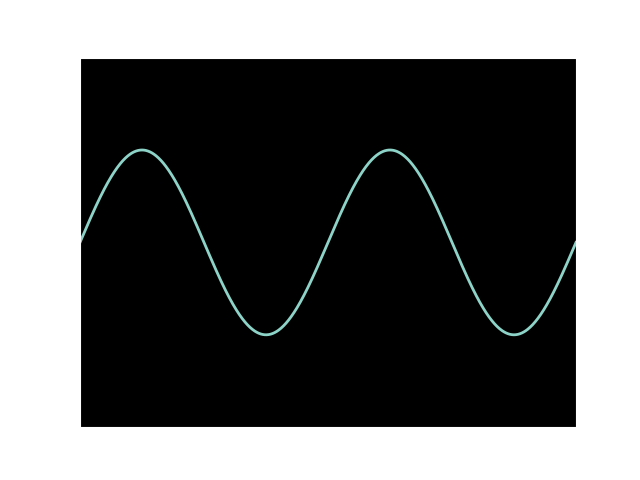

In [309]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)
line.set_data([], [])
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
anim = FuncAnimation(fig, animate,frames=100, interval=20, blit=True,repeat=True)

In [338]:
times=np.linspace(0,50,100)

In [339]:
def r(x,y):
    return (x**2+y**2)**(1/2)

In [346]:
k,m,l=0.2,2.,0.5
def f(x,y):
    return -k/m*(1-l/r(x,y))

In [347]:
g=9.81
def func(u,t):
    x,dx,y,dy=u
    return dx, x*f(x,y), dy, g+y*f(x,y)

In [357]:
od2=odeint(func,[np.cos(np.pi/3),1,np.sin(np.pi/3),0],times)

<IPython.core.display.Javascript object>


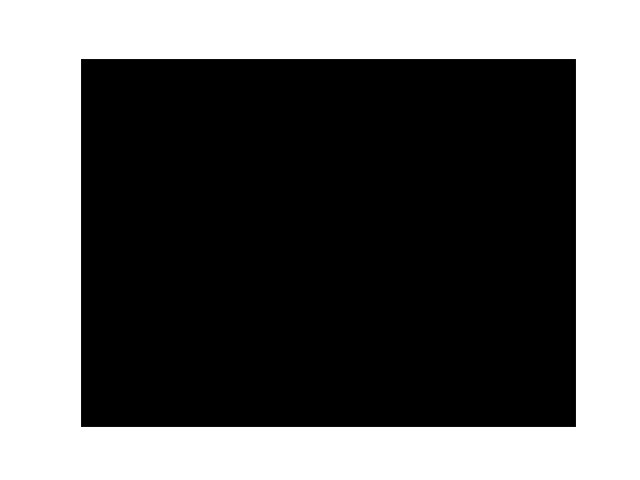

In [358]:
from random import randint

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x=od2[:,0]
y=od2[:,2]

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))

def animate(i):
    line.set_data(od2[:i,0], od2[:i,2])
    return (line,)

ani = FuncAnimation(fig, animate, frames=len(od[:,0]), interval=50,blit=True, )
plt.show()

In [1]:
from scipy.integrate import solve_ivp as solve
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as FunAnimation

In [6]:
theta=np.pi/4
k=0.5
m=2
l=0.5
g=9.81

In [2]:
times=np.linspace(0,30,301)

In [3]:
def r(x,y):
    return (x**2+y**2)**(1/2)

In [7]:
def f(x,y):
    return -k/m*(1-l/r(x,y))

In [9]:
def func(t,u):
    x,dx,y,dy=u
    return dx, x*f(x,y), dy, g+y*f(x,y)

In [37]:
sol=solve(func, (0,30), [np.sin(theta),-np.cos(theta),-np.cos(theta),0], t_eval=np.linspace(0,30,301))

In [38]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 182
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2,

In [39]:
sol.y

array([[ 7.07106781e-01,  6.35978733e-01,  5.64135938e-01, ...,
        -9.81548507e-01, -9.90834031e-01, -9.97661020e-01],
       [-7.07106781e-01, -7.15183397e-01, -7.21278614e-01, ...,
        -1.05074908e-01, -8.05965747e-02, -5.59145428e-02],
       [-7.07106781e-01, -6.57630029e-01, -5.09321843e-01, ...,
         6.71812235e+01,  6.86307885e+01,  7.00081412e+01],
       [ 0.00000000e+00,  9.89303478e-01,  1.97634577e+00, ...,
         1.48447819e+01,  1.41404838e+01,  1.34008419e+01]])

In [40]:
x,y=sol.y[0],sol.y[3]

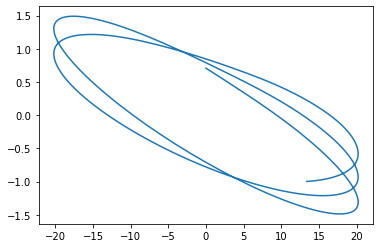

In [47]:
%matplotlib inline
plt.plot(y,x)

<IPython.core.display.Javascript object>


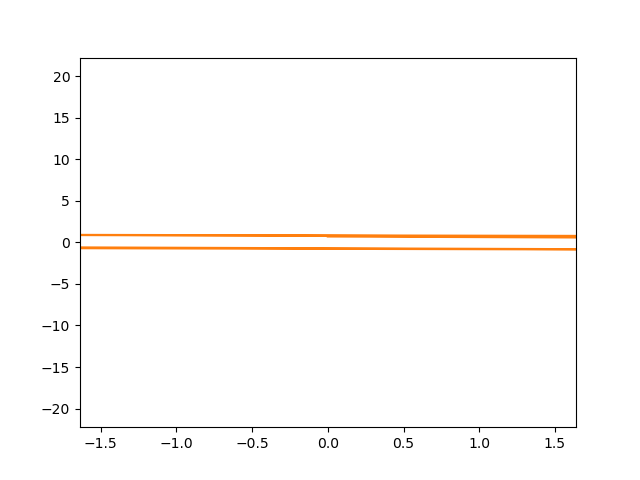

In [45]:
%matplotlib notebook

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
ax.set_xlim(min(x)*1.1,max(x)*1.1)
ax.set_ylim(min(y)*1.1,max(y)*1.1)

def animate(i):
    line.set_data(x[:i],y[:i])
    return (line,)

ani = FuncAnimation(fig, animate, frames=len(x), interval=50,blit=True, )
plt.show()

<IPython.core.display.Javascript object>


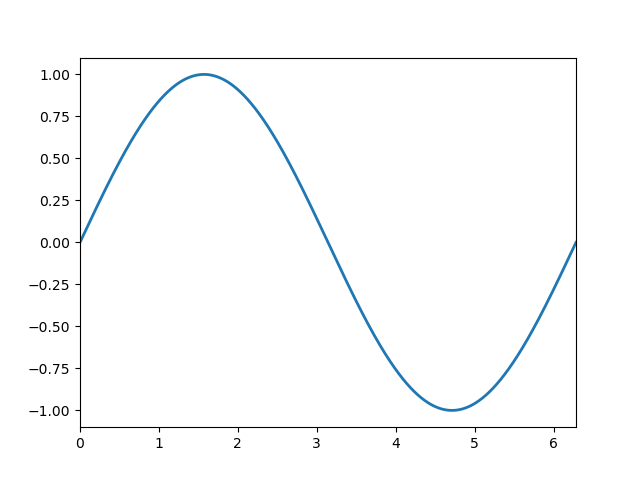

In [34]:
%matplotlib notebook

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.1, 1.1)

n=10
xs=np.linspace(0,n,n*10)
ys=[]

def animate(i):
    xs=np.linspace(0,2*np.pi,1000)
    ys=np.sin(xs+2*np.pi*i*0.05)
    
    line.set_data(xs,ys)
    return (line,)

ani = FuncAnimation(fig, animate, frames=n*9, interval=50,blit=True)
plt.show()

In [43]:
k=0.5
m=2
l=0.5
g=9.81

In [44]:
def func(t,u):
    r,fi,dr,dfi=u
    return dr, dfi, g*np.cos(fi)-k/m*r+(l+r)*dfi**2, (-g*np.sin(fi) *2*dfi*dr)/(l+r)

In [58]:
sol2=solve(func, (0,30), [l,np.pi/4,1,1], t_eval=np.linspace(0,30,301))

In [59]:
r,fi=sol2.y[0],sol2.y[3]

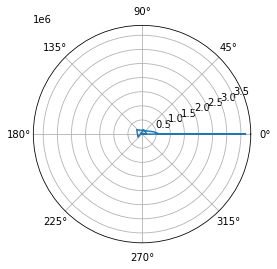

In [61]:
%matplotlib inline
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(fi, r)
#ax.grid(True)

plt.show()

In [60]:
fi

array([ 1.00000000e+00,  1.62105241e-01,  1.50640794e-02,  1.08384329e-03,
        7.15455986e-05,  4.87919648e-06,  2.82389940e-07, -1.27880665e-07,
       -7.87401372e-08, -7.91464888e-09, -3.51665539e-07,  5.10167026e-07,
       -3.29923410e-07,  7.87414274e-07, -1.67541919e-07,  5.12302548e-07,
       -1.56352721e-07,  1.98750390e-07,  1.61361345e-08, -3.08095592e-07,
        4.29465878e-07, -5.65925533e-08, -5.22218042e-07,  2.60469809e-07,
        5.62396333e-07, -2.82986225e-07, -3.50415551e-07,  4.22686063e-07,
        5.00539506e-07, -3.81022716e-08, -1.82719534e-07,  1.26471412e-07,
        3.86607264e-07,  1.51175667e-07, -3.93503552e-08, -7.78124290e-08,
        2.78295659e-08,  1.64470553e-07,  1.42125310e-07,  6.51405821e-08,
        7.36067662e-09, -2.28577658e-08, -2.42420522e-08, -2.60343752e-09,
        2.91628761e-08,  5.10777390e-08,  4.37358078e-08,  3.59370571e-08,
        3.26235307e-08,  3.14642671e-08,  3.06045142e-08,  2.86657298e-08,
        2.47455811e-08,  

In [ ]:
%matplotlib notebook

fig, ax = plt.subplots()
line, = ax.plot([],[],lw=2)     # A tuple unpacking to unpack the only plot
line.set_data([],[])
ax.set_xlim(min(x)*1.1,max(x)*1.1)
ax.set_ylim(min(y)*1.1,max(y)*1.1)

def animate(i):
    line.set_data(x[:i],y[:i])
    return (line,)

ani = FuncAnimation(fig, animate, frames=len(x), interval=50,blit=True, )
plt.show()